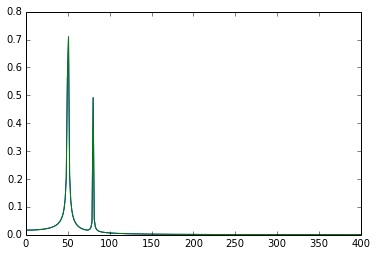

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

# Number of samplepoints
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
fig, ax = plt.subplots()
ax.plot(xf, 2.0/N * np.abs(yf[0:N/2]))
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

ax.plot(xf, 2.0/N * np.abs(yf[0:N/2]))

In [4]:
def FFT_vectorized(x):
    """A vectorized, non-recursive version of the Cooley-Tukey FFT"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]

    if np.log2(N) % 1 > 0:
        raise ValueError("size of x must be a power of 2")

    # N_min here is equivalent to the stopping condition above,
    # and should be a power of 2
    N_min = min(N, 32)
    
    # Perform an O[N^2] DFT on all length-N_min sub-problems at once
    n = np.arange(N_min)
    k = n[:, None]
    M = np.exp(-2j * np.pi * n * k / N_min)
    X = np.dot(M, x.reshape((N_min, -1)))

    # build-up each level of the recursive calculation all at once
    while X.shape[0] < N:
        X_even = X[:, :X.shape[1] / 2]
        X_odd = X[:, X.shape[1] / 2:]
        factor = np.exp(-1j * np.pi * np.arange(X.shape[0])
                        / X.shape[0])[:, None]
        X = np.vstack([X_even + factor * X_odd,
                       X_even - factor * X_odd])

    return X.ravel()

x = np.random.random(1024 * 16)
%timeit FFT_vectorized(x)
%timeit np.fft.fft(x)

100 loops, best of 3: 4.84 ms per loop
1000 loops, best of 3: 504 µs per loop


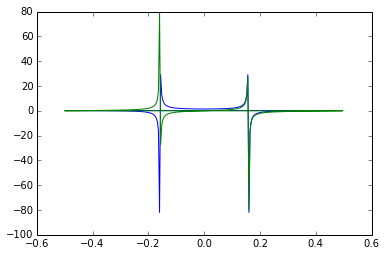

In [5]:
import matplotlib.pyplot as plt
t = np.arange(256)
sp = np.fft.fft(np.sin(t))
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [8]:
y = np.exp(2j * np.pi * np.arange(8) / 8)
print y.shape

np.fft.fft(np.exp(2j * np.pi * np.arange(8) / 8))

(8,)


array([ -3.44509285e-16 +1.14423775e-17j,
         8.00000000e+00 -5.68502218e-15j,
         2.33486982e-16 +1.22464680e-16j,
         1.44328993e-15 +1.77635684e-15j,
         9.95799250e-17 +2.33486982e-16j,
         0.00000000e+00 +1.64244978e-15j,
         1.14423775e-17 +1.22464680e-16j,  -1.44328993e-15 +1.77635684e-15j])

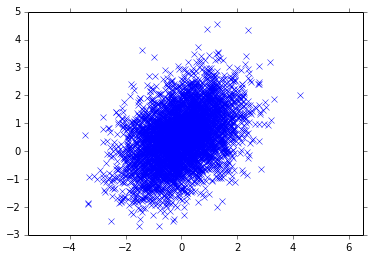

In [12]:
# Plot a Gaussian
import matplotlib.pyplot as plt
x,y = np.random.multivariate_normal(mean,cov,5000).T
plt.plot(x,y,'x'); plt.axis('equal'); plt.show()

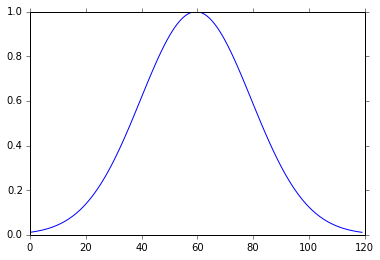

In [19]:
from matplotlib import pyplot as plt
import numpy as np

def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

x = np.linspace(-3, 3, 120)

mu = 0
sig = 1

y = gaussian(x,mu,sig)

plt.plot(gaussian(np.linspace(-3, 3, 120), mu, sig))
plt.show()

In [ ]:
# Fourier series approximation of the Gaussian

[0.583333, 1.12479, -1.27552, 0.904708, -0.441296]
[0.0, -2.6255, 0.580905, 0.219974, -0.540057]


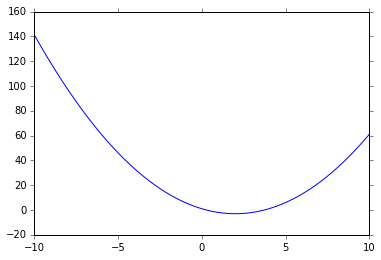

In [51]:
from sympy.mpmath import *
I = [-1, 1.5]
f = lambda x: x**2 - 4*x + 1
cs = fourier(f, I, 4)
nprint(cs[0])
nprint(cs[1])

x = np.linspace(-10,10,1000)
y = f(x) 

plt.plot(x,y)
plt.show()



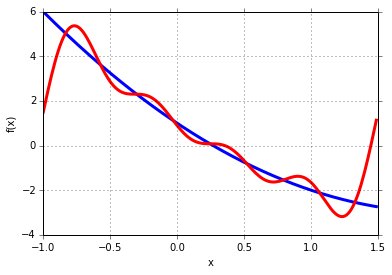

In [52]:
plot([f, lambda x: fourierval(cs, I, x)], I)

In [53]:
def gaussian(x):
    mu = 0
    sig = 1
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))



[0.282524, 0.439732]
[0.0, 0.0]


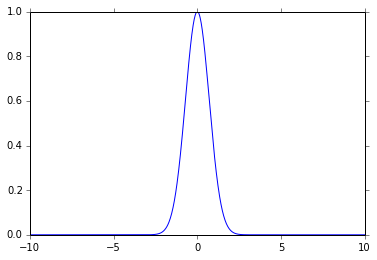

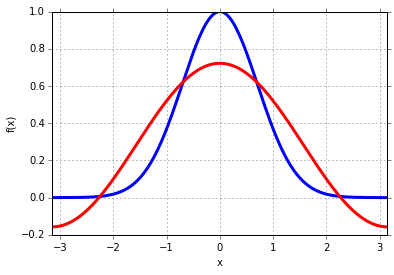

In [63]:
from sympy.mpmath import *
I = [-math.pi, math.pi]
f = lambda x: 2.71 ** (-(x-0)**2)
cs = fourier(f, I, 1)
nprint(cs[0])
nprint(cs[1])

x = np.linspace(-10,10,1000)
y = f(x) 

plt.plot(x,y)
plt.show()
plot([f, lambda x: fourierval(cs, I, x)], I)